<a href="https://colab.research.google.com/github/ShehaniLEON/Capstone-Project_FINAL/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#run the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# LOADING THE DATASET

file_name = 'https://github.com/ShehaniLEON/Capstone-Project_FINAL/raw/main/diabetes.csv'

# Load CSV File
df = pd.read_csv(file_name)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploring the dataset

In [13]:
# size of the dataset
df.shape

(768, 9)

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pre Processing Data

In [16]:
# identify any null records
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# identify duplicates
duplicates = df[df.duplicated()]
duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [18]:
# create a unique ID for each patient record
df.index

RangeIndex(start=0, stop=768, step=1)

In [19]:
df['Patient ID'] = df.index+1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient ID
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5


In [20]:
print ("total number of rows :",format(len(df)))
print("number of rows where Glucose is zero: {0}",format(len(df.loc[df['Glucose'] == 0])))
print("number of rows where BloodPressure is zero: {0}",format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows where SkinThickness is zero: {0}",format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows where Insulin is zero: {0}",format(len(df.loc[df['Insulin'] == 0])))
print("number of rows where BMI is zero: {0}",format(len(df.loc[df['BMI'] == 0])))
print("number of rows where DiabetesPedigreeFunction is zero: {0}",format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows where Age is zero: {0}",format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
number of rows where Glucose is zero: {0} 5
number of rows where BloodPressure is zero: {0} 35
number of rows where SkinThickness is zero: {0} 227
number of rows where Insulin is zero: {0} 374
number of rows where BMI is zero: {0} 11
number of rows where DiabetesPedigreeFunction is zero: {0} 0
number of rows where Age is zero: {0} 0


In [21]:
#we see for some patients, certain attributes has the value zero
#we will be replacing the zero's with the median value.

df["Insulin"]= df["Insulin"].replace(0,df["Insulin"].median())
df["Glucose"]= df["Glucose"].replace(0,df["Glucose"].median())
df["BloodPressure"]= df["BloodPressure"].replace(0,df["BloodPressure"].median())
df["SkinThickness"]= df["SkinThickness"].replace(0,df["SkinThickness"].median())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient ID
0,6,148,72,35,30.5,33.6,0.627,50,1,1
1,1,85,66,29,30.5,26.6,0.351,31,0,2
2,8,183,64,23,30.5,23.3,0.672,32,1,3
3,1,89,66,23,94.0,28.1,0.167,21,0,4
4,0,137,40,35,168.0,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,764
764,2,122,70,27,30.5,36.8,0.340,27,0,765
765,5,121,72,23,112.0,26.2,0.245,30,0,766
766,1,126,60,23,30.5,30.1,0.349,47,1,767


Data Visualization

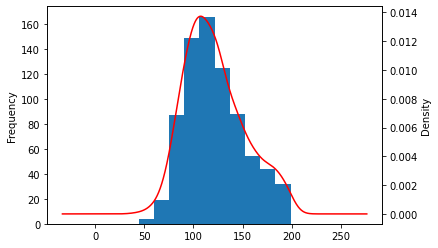

In [22]:
f,ax0 = plt.subplots()
ax1 = ax0.twinx()

df['Glucose'].plot(kind='hist',ax=ax0)
df['Glucose'].plot(kind='kde', c='red', ax=ax1)

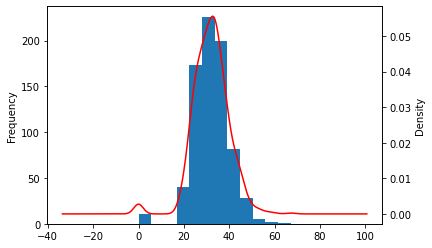

In [23]:
f,ax0 = plt.subplots()
ax1 = ax0.twinx()

df['BMI'].plot(kind='hist', bins=12, ax=ax0)
df['BMI'].plot(kind='kde', c='red', ax=ax1)

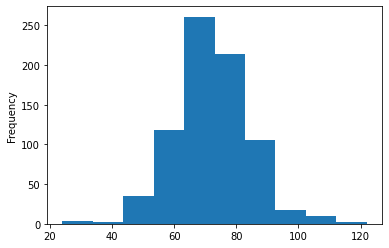

In [24]:
df['BloodPressure'].plot(kind='hist')

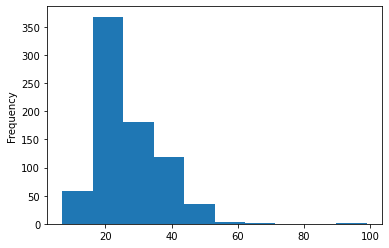

In [25]:
df['SkinThickness'].plot(kind='hist')

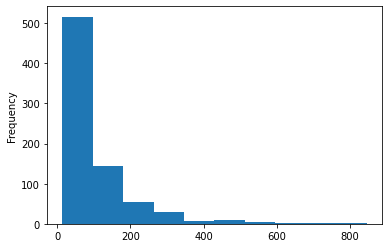

In [26]:
df['Insulin'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

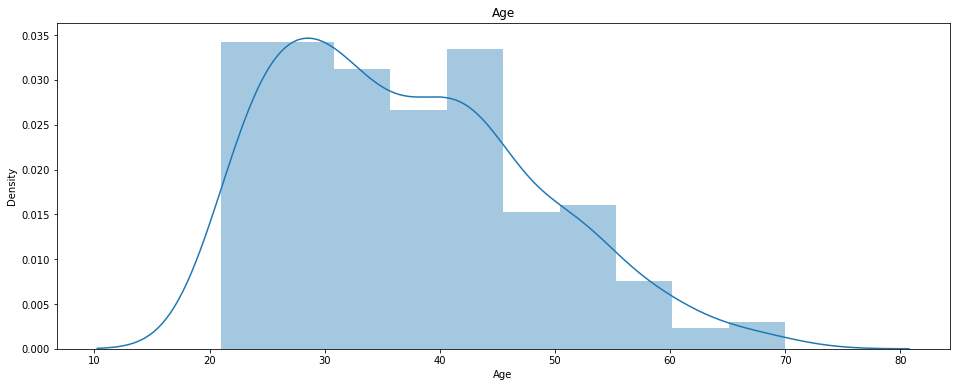

In [27]:
fig= plt.figure(figsize=(16,6))

sns.distplot(df["Age"][df["Outcome"]==1])
plt.title("Age")

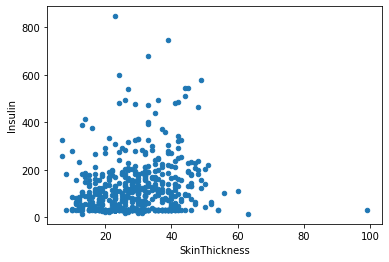

In [28]:
df.plot(x='SkinThickness', y='Insulin', kind='scatter')

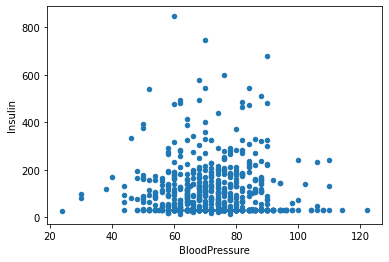

In [29]:
df.plot(x='BloodPressure', y='Insulin', kind='scatter')

Treating outliers(removing outliers)

In [31]:
def remove_outlier (dataFrame):
  for column_name in dataFrame.columns:
    Q1= df[column_name].quantile(0.25)
    Q3= df[column_name].quantile(0.75)
    IQR=Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(f"{column_name}>>lower limit:{lower_limit} \n upper limit:{upper_limit}")
    dataFrame=dataFrame[(dataFrame[column_name] > lower_limit)|(dataFrame[column_name] <upper_limit)]

    return dataFrame

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient ID
0,6,148,72,35,30.5,33.6,0.627,50,1,1
1,1,85,66,29,30.5,26.6,0.351,31,0,2
2,8,183,64,23,30.5,23.3,0.672,32,1,3
3,1,89,66,23,94.0,28.1,0.167,21,0,4
4,0,137,40,35,168.0,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,764
764,2,122,70,27,30.5,36.8,0.340,27,0,765
765,5,121,72,23,112.0,26.2,0.245,30,0,766
766,1,126,60,23,30.5,30.1,0.349,47,1,767


In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Patient ID'],
      dtype='object')

In [34]:
correlation_matrix = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()
correlation_matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient ID
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.017683,-0.033523,0.544341,0.221898,-0.037201
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.235035,0.137327,0.266909,0.492782,0.003088
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.234336,-0.002378,0.324915,0.165723,0.028786
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.504307,0.142977,0.054514,0.189065,0.020776
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.197284,0.178029,-0.015413,0.148457,0.000156
BMI,0.017683,0.235035,0.234336,0.504307,0.197284,1.000000,0.140647,0.036242,0.292695,0.012320
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.140647,1.000000,0.033561,0.173844,-0.040326
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.036242,0.033561,1.000000,0.238356,0.007714
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.292695,0.173844,0.238356,1.000000,-0.045184
Patient ID,-0.037201,0.003088,0.028786,0.020776,0.000156,0.012320,-0.040326,0.007714,-0.045184,1.000000


In [35]:
correlation_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.189065
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
Name: Outcome, dtype: float64

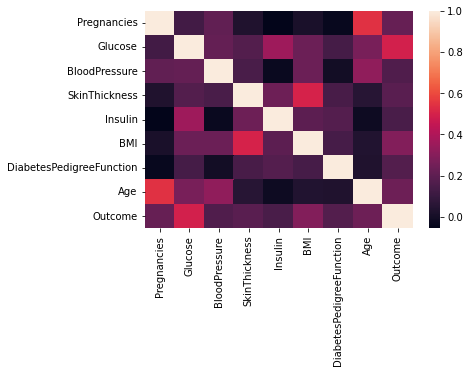

In [36]:
sns.heatmap(correlation_matrix)

In [37]:
X= df.drop(['Outcome','Insulin','BloodPressure'], axis=1)
X

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Patient ID
0,6,148,35,33.6,0.627,50,1
1,1,85,29,26.6,0.351,31,2
2,8,183,23,23.3,0.672,32,3
3,1,89,23,28.1,0.167,21,4
4,0,137,35,43.1,2.288,33,5
...,...,...,...,...,...,...,...
763,10,101,48,32.9,0.171,63,764
764,2,122,27,36.8,0.340,27,765
765,5,121,23,26.2,0.245,30,766
766,1,126,23,30.1,0.349,47,767


In [38]:
Y=df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=42)

In [44]:
X_train

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Patient ID
60,2,84,23,0.0,0.304,21,61
618,9,112,24,28.2,1.282,50,619
346,1,139,19,28.7,0.654,22,347
294,0,161,23,21.9,0.254,65,295
231,6,134,37,46.2,0.238,46,232
...,...,...,...,...,...,...,...
71,5,139,35,28.6,0.411,26,72
106,1,96,23,22.4,0.207,27,107
270,10,101,37,45.6,1.136,38,271
435,0,141,23,42.4,0.205,29,436


In [43]:
Y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [42]:
Y=df['Outcome']
Y

Train sample size = 614
Test sample size  = 154


Model building

(1) Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model =LogisticRegression()

In [47]:
#train the model using training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [48]:
# predict using testing data
predictions= model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Evaluating the model

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(Y_test,predictions)
cm

array([[83, 16],
       [19, 36]])

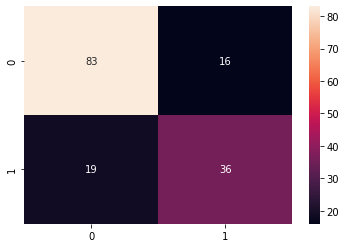

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]


test_result = pd.DataFrame(data={'y_act':Y_test, 'y_pred':predictions, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1
639,0,0,0.968356,0.031644
350,0,0,0.764370,0.235630
516,1,1,0.290470,0.709530
213,1,1,0.440341,0.559659
409,1,1,0.176747,0.823253
763,0,0,0.646956,0.353044
133,0,0,0.716362,0.283638
457,0,0,0.925139,0.074861
396,0,0,0.858762,0.141238
691,1,1,0.136449,0.863551


In [53]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,83,16,99
1,19,36,55
All,102,52,154


In [54]:
accuracy = (cfm.loc[0,0] + cfm.loc[1,1])/ cfm.loc['All','All'] 
accuracy

0.7727272727272727

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



(2) Random Forest Classifier

In [82]:
#standard scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [83]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [84]:
rf_y_pred =rf_classifier.predict(X_test)

In [85]:
rf_cm=confusion_matrix(rf_y_pred,Y_test)
rf_cm

array([[81, 20],
       [18, 35]])

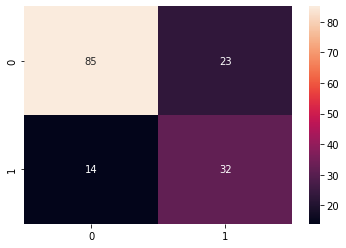

In [76]:
sns.heatmap(rf_cm, annot=True)

In [86]:
print("Accuracy:", sum(rf_y_pred== Y_test)/len(rf_y_pred))

Accuracy: 0.7532467532467533
